In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importar DataSet

In [ ]:
from google.colab import files 
import io 
datos = files.upload()

Saving fahrenheit_celsius.csv to fahrenheit_celsius (1).csv


## Importando el DataSet de Parámetros input-output

In [ ]:
fahrenheit_celsius = pd.read_csv(io.BytesIO(datos['fahrenheit_celsius.csv']))
fahrenheit_celsius

,grados_base,grados_convertidos
0,867.60757,464.2264
1,875.43848,468.5769
2,-167.93663,-111.0759
3,-857.23936,-494.0219
4,80.59053,26.9947
...,...,...
995,-715.34827,-415.1935
996,-740.95161,-429.4176
997,744.55192,395.8622
998,49.95664,9.9759


## Creamos Método de conversión

In [ ]:
#creamos una funcion para convertir
def f_conv_cels_fah (p_fahrens):
  #fah= p_celsius*1.8 + 32
  celsis =(p_fahrens - 32) * 5/9
  return celsis

print('200° Fahrenheits = ',
      f_conv_cels_fah(200),
      '° Celsius ')

200° Fahrenheits =  93.33333333333333 ° Celsius 


### Anotación !
Como el dataset es creado y revisado no se dejaron campos nulos.

## Conociendo los datos

In [ ]:
fahrenheit_celsius.describe()

,grados_base,grados_convertidos
count,1000.000000,1000.000000
mean,15.147991,-9.362229
std,583.618037,324.232242
min,-999.985330,-573.325200
25%,-505.980545,-298.878125
50%,9.315035,-12.602800
75%,527.488315,275.271250
max,997.783700,536.546500


In [ ]:
fahrenheit_celsius.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   grados_base         1000 non-null   float64
 1   grados_convertidos  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


## Separando Input de Outputs

In [ ]:
fahrenheits = fahrenheit_celsius['grados_base']
celsius = fahrenheit_celsius['grados_convertidos']

### Revisamos que hay sido correcta la separación:

In [ ]:
fahrenheits

0      867.60757
1      875.43848
2     -167.93663
3     -857.23936
4       80.59053
         ...    
995   -715.34827
996   -740.95161
997    744.55192
998     49.95664
999   -460.69546
Name: grados_base, Length: 1000, dtype: float64

In [ ]:
celsius

0      464.2264
1      468.5769
2     -111.0759
3     -494.0219
4       26.9947
         ...   
995   -415.1935
996   -429.4176
997    395.8622
998      9.9759
999   -273.7197
Name: grados_convertidos, Length: 1000, dtype: float64

### Se creara la red neuronal
Usamos Keras como libreria de alto nivel (facilita mucho la creación de redes neuronales)

usaremos un modelo secuencial (una red simple), hay más modelos, ejemplo: CNN, LSTM/ RNN, GAN, BERT

crearemos 3 capas densas, que son aquellas que tiene conexiones con todas las neuronas de la siguiente capa, donde:
- Units= cantidad de neuronas
- input_shape= cantidad de nueronas de entrada

In [ ]:
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])

### Compilamos la red neuronal

- Usaremos el optimizador ADAM, hay otros más complejos como RELU, SOFTMAX...etc...es quien le dice a la red como ajustar los pesos y los sesgos (le dice como aprender y no desaprender)

- definiremos una tasa de aprendizaje de 0.1 (entre más pequeño el número el ajuste es menor y más tiempo dura en aprender).

- tomaremos la una función de calculo de perdida del aprendizaje llamada "MEAN_SQUARED_ERROR- error cuadradico medio", que es "una poca cantidad de error grandes es PEOR que una gran cantidad de errores pequeños"


In [ ]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)


### Entrenamiento

In [ ]:
print("Comenzando entrenamiento...")
historial = modelo.fit(fahrenheits, celsius, epochs=1000, verbose=True)
print("Modelo entrenado!")

Comenzando entrenamiento...
Epoch 1/1000
32/32 [==============================] - 1s 1ms/step - loss: 2852.7556
Epoch 2/1000
32/32 [==============================] - 0s 1ms/step - loss: 292.7948
Epoch 3/1000
32/32 [==============================] - 0s 1ms/step - loss: 133.3610
Epoch 4/1000
32/32 [==============================] - 0s 1ms/step - loss: 82.8640
Epoch 5/1000
32/32 [==============================] - 0s 1ms/step - loss: 49.3147
Epoch 6/1000
32/32 [==============================] - 0s 1ms/step - loss: 29.6147
Epoch 7/1000
32/32 [==============================] - 0s 1ms/step - loss: 16.0345
Epoch 8/1000
32/32 [==============================] - 0s 1ms/step - loss: 8.4819
Epoch 9/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.9448
Epoch 10/1000
32/32 [==============================] - 0s 981us/step - loss: 1.9951
Epoch 11/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.8326
Epoch 12/1000
32/32 [==============================] - 0s 1ms/step

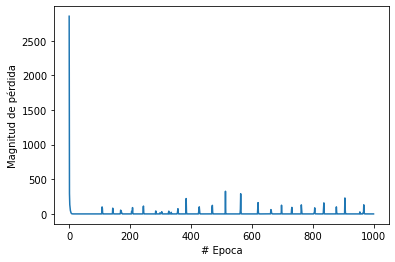

In [ ]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

### Predicción

In [ ]:
fahrens = 200
print("Hagamos una predicción!")
resul_IA   = modelo.predict([fahrens])
result_real= f_conv_cels_fah(fahrens)
dif        = 100-(resul_IA*100/result_real)
print('Fahrenheits= ',fahrens, '° = Celsius:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

Hagamos una predicción!
Fahrenheits=  200 ° = Celsius: 
IA:  [[93.33382]] 
Regular:  93.33333333333333 
Dif %: [[-0.0005188]]


### Conociendo Pesos y Sesgos
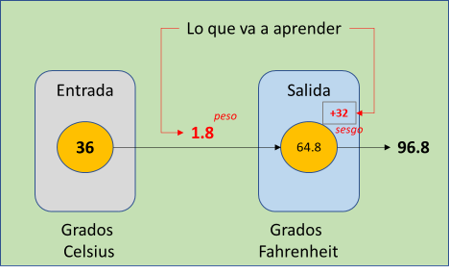

In [43]:
print("Variables internas del modelo")
print('peso: ',capa.get_weights()[0])
print('sesgo: ',capa.get_weights()[1])

Variables internas del modelo
peso:  [[0.5555581]]
sesgo:  [-17.7778]


## Con más Neuronas

In [81]:
oculta1 = tf.keras.layers.Dense(units=5, input_shape=[1])  # capa DENSA con 5 neuronas y el entra información de 1 capa
oculta2 = tf.keras.layers.Dense(units=2)                   # capa DENSA con 4 neuronas
salida  = tf.keras.layers.Dense(units=1)                    # capa de salida con 1 neurona
#creamos el modelo con las 4 capas (recuerden 1 que la de la parametros no hace falta definirla)
modelo_v2 = tf.keras.Sequential([oculta1, oculta2, salida])

## Volvemos a compilar

In [88]:
# compilamos
modelo_v2.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mean_squared_error'
)
##modelo_v2.compile(
#    optimizer=tf.keras.optimizers.Ftrl(0.001),
#    loss='mean_squared_error'
#)

## Volver a Entrenar

In [89]:
#entrenamos
print("Comenzando entrenamiento...")
historial_V2 = modelo_v2.fit(fahrenheits, celsius, epochs=2000, verbose=False)
print("modelo_v2 entrenado!")

Comenzando entrenamiento...
modelo_v2 entrenado!


## Gráfica de resultados

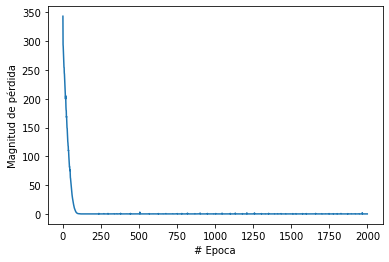

In [90]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial_V2.history["loss"])

## Conociendo pesos y sesgos resultantes

In [91]:
print("Variables internas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[ 0.4357301 , -0.15144159,  0.6617794 ]], dtype=float32), array([ 2.3597295,  2.3658278, -2.317384 ], dtype=float32)]
[array([[ 0.7612291 ,  0.7327994 ],
       [ 1.2670203 ,  0.8576828 ],
       [-1.2526495 , -0.39088744]], dtype=float32), array([2.2541716, 2.3808167], dtype=float32)]
[array([[-0.68034065],
       [-1.2514882 ]], dtype=float32), array([-2.1910508], dtype=float32)]


### Predicción 2

In [92]:
fahrens = 200
print("Hagamos una predicción!")
resul_IA   = modelo_v2.predict([fahrens])
result_real= f_conv_cels_fah(fahrens)
dif        = 100-(resul_IA*100/result_real)
print('Fahrenheits = ',fahrens, '° = Celsius:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

Hagamos una predicción!
Fahrenheits =  200 ° = Celsius: 
IA:  [[93.33334]] 
Regular:  93.33333333333333 
Dif %: [[-7.6293945e-06]]
